In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('data/philosophy_data.csv')

In [23]:
df.isnull().sum()

title                        0
author                       0
school                       0
sentence_spacy               0
sentence_str                 0
original_publication_date    0
corpus_edition_date          0
sentence_length              0
sentence_lowered             0
tokenized_txt                0
lemmatized_str               0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


In [25]:
df2 = df.drop_duplicates('sentence_lowered')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360780 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360780 non-null  object
 1   author                     360780 non-null  object
 2   school                     360780 non-null  object
 3   sentence_spacy             360780 non-null  object
 4   sentence_str               360780 non-null  object
 5   original_publication_date  360780 non-null  int64 
 6   corpus_edition_date        360780 non-null  int64 
 7   sentence_length            360780 non-null  int64 
 8   sentence_lowered           360780 non-null  object
 9   tokenized_txt              360780 non-null  object
 10  lemmatized_str             360780 non-null  object
dtypes: int64(3), object(8)
memory usage: 33.0+ MB


<AxesSubplot:title={'center':'Author Count Distribution'}, xlabel='count', ylabel='author'>

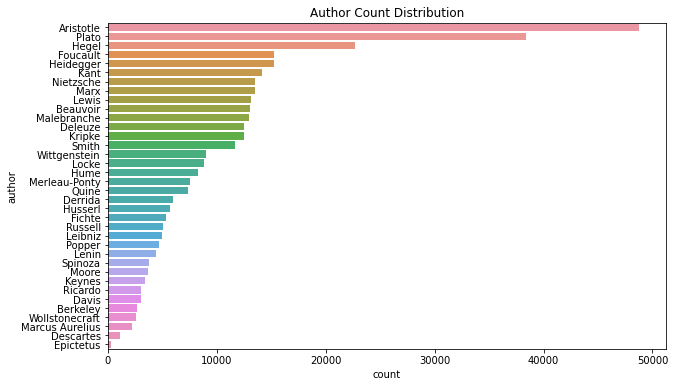

In [36]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Author Count Distribution')
sns.countplot(y = 'author', data = df2, order = df2['author'].value_counts().index)

In [6]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Enhanced stopwording
more_stopwords = {'  ', '   '}
stopwords = stopwords.union(more_stopwords)

In [7]:
from collections import defaultdict
import nltk

In [8]:
def remove_punc(string):
    punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~ '''
    for ele in string:  
        if ele in punc:  
            string = string.replace(ele, "") 
    return string

In [9]:
def generate_ngrams(text, n_gram=1):
    from nltk.tokenize import word_tokenize
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    #text = tokenizer.tokenize(text)

    token = [token for token in text.split(" ") if token != "" if token not in stopwords]
    token = [remove_punc(i) for i in token]
    #token = [token for token in tokenizer.tokenize(text) if token != "" if token not in STOPWORDS]
    
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [10]:
## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [11]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [12]:
## Get the bar chart from bad reviews ##
freq_dict = defaultdict(int)
for sent in df2["sentence_lowered"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# ## Get the bar chart from good Reviews ##
# freq_dict = defaultdict(int)
# for sent in good_df["Reviews"]:
#     for word in generate_ngrams(sent):
#         freq_dict[word] += 1
# fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
# fd_sorted.columns = ["word", "wordcount"]
# trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [13]:
## Get the bar chart from bad reviews ##
freq_dict = defaultdict(int)
for sent in df2["sentence_lowered"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# ## Get the bar chart from good Reviews ##
# freq_dict = defaultdict(int)
# for sent in good_df["Reviews"]:
#     for word in generate_ngrams(sent):
#         freq_dict[word] += 1
# fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
# fd_sorted.columns = ["word", "wordcount"]
# trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [14]:
## Get the bar chart from bad reviews ##
freq_dict = defaultdict(int)
for sent in df2["sentence_lowered"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# ## Get the bar chart from good Reviews ##
# freq_dict = defaultdict(int)
# for sent in good_df["Reviews"]:
#     for word in generate_ngrams(sent):
#         freq_dict[word] += 1
# fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
# fd_sorted.columns = ["word", "wordcount"]
# trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [15]:
## Get the bar chart from bad reviews ##
freq_dict = defaultdict(int)
for sent in df2["sentence_lowered"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# ## Get the bar chart from good Reviews ##
# freq_dict = defaultdict(int)
# for sent in good_df["Reviews"]:
#     for word in generate_ngrams(sent):
#         freq_dict[word] += 1
# fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
# fd_sorted.columns = ["word", "wordcount"]
# trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



classify how people think about the world
how the topics of discussions have changed over time
what certain authors' were concerned about the most
how the sentiment of a certain topic changed over time
how the sentiment of a certain topic changed over time - hue authors
the author's sentence type (length, their frequently used vocab)
what where the most firmly held beliefs.
